<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
Imporrt Library
</div>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

In [17]:
df = pd.read_csv("BTC-USD-5Tahun2023.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-11,6331.879883,6398.919922,6260.209961,6321.200195,6321.200195,3849910000
1,2018-09-12,6317.009766,6363.870117,6265.089844,6351.799805,6351.799805,4064230000
2,2018-09-13,6354.240234,6535.410156,6354.240234,6517.310059,6517.310059,4210910000
3,2018-09-14,6515.410156,6596.100098,6456.169922,6512.709961,6512.709961,4076220000
4,2018-09-15,6509.399902,6561.720215,6493.549805,6543.200195,6543.200195,3216300000


alpha = 16049953870.397133
beta = 522300.93313260167


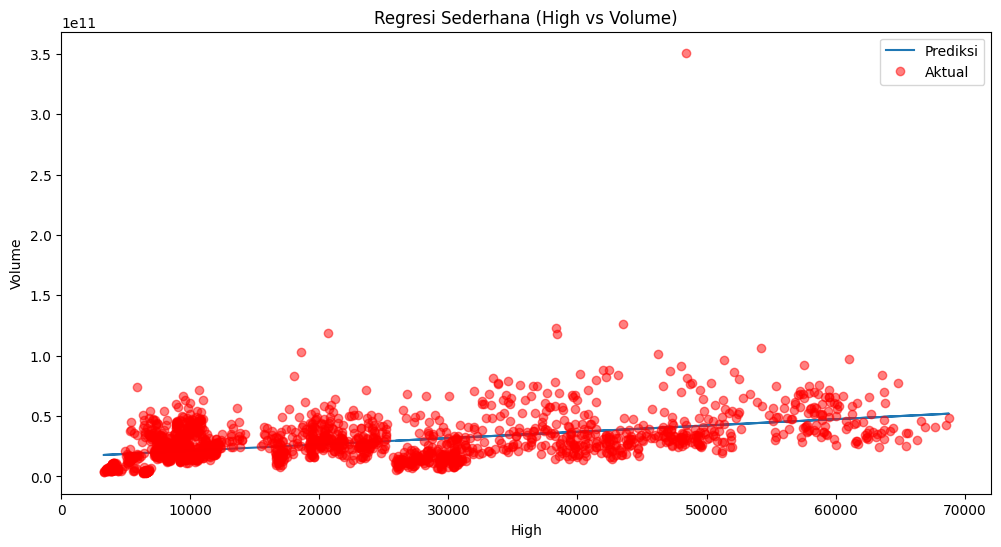

In [24]:
#Perbandingan High dan Volume

# variable x dan y
x = df["High"]
y = df["Volume"]

# hitung mean
xmean = np.mean(x)
ymean = np.mean(y)

# hitung covariance dan variance
xycov = (x - xmean) * (y - ymean)
xvar = (x - xmean)**2

# hitung beta & alpha
beta = xycov.sum() / xvar.sum()
alpha = ymean - (beta * xmean)

print(f"alpha = {alpha}")
print(f"beta = {beta}")

# fungsi prediksi
ypred = alpha + beta * x

# plot
plt.figure(figsize=(12,6))
plt.plot(x, ypred, label="Prediksi")
plt.plot(x, y, "ro", label="Aktual", alpha=0.5)
plt.title("Regresi Sederhana (High vs Volume)")
plt.xlabel("High")
plt.ylabel("Volume")
plt.legend()

plt.show()

In [25]:
# pilih variabel
x1 = df["High"]
x2 = df["Low"]
y = df["Volume"]

# buat dataframe
data = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# analisis regresi
X = sm.add_constant(data[["x1","x2"]])
model = sm.OLS(data["y"], X).fit()
koefisien = model.params
print(koefisien)

# scatter plot 3D
scatter_plot = go.Scatter3d(
    x=data["x1"], y=data["x2"], z=data["y"],
    mode="markers", marker=dict(size=4, color="blue", opacity=0.6),
    name="Data BTC"
)

# grid permukaan regresi
x1_grid, x2_grid = np.meshgrid(
    np.linspace(data["x1"].min(), data["x1"].max(), 20),
    np.linspace(data["x2"].min(), data["x2"].max(), 20)
)
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

regresion_surface = go.Surface(
    x=x1_grid, y=x2_grid, z=y_pred,
    colorscale="Reds", opacity=0.5, name="Garis Regresi"
)

# buat layout
layout = go.Layout(
    title="Scatter 3D Regresi BTC High vs Low & Volume)",
    scene=dict(xaxis_title="High", yaxis_title="Kow", zaxis_title="Volume"),
    showlegend=True
)

# buat figure
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

# menampilkan show
fig.show()

const    1.806760e+10
x1       9.682374e+06
x2      -9.704642e+06
dtype: float64
